# **Checkpoint 4**

## **Importación de bibliotecas y datasets de entrenamiento y evaluación.**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score, make_scorer, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier

import joblib

np.random.seed(0)
tf.random.set_seed(0) 

### **Dataset de entrenamiento**

Nuevamente importaremos el dataframe obtenido tras finalizar el Checkpoint 1:

In [ ]:
df_chp1 = pd.read_csv('https://raw.githubusercontent.com/AlanBotoshansky/7506R-1C2023-GRUPO14/main/TP1/Datasets/dataset_chp1.csv')
df = df_chp1.copy()
df

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0,...,No Deposit,9,Undefined,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,Yes
1,Resort Hotel,4,2015,October,44,31,0,1,2,0,...,No Deposit,Undefined,Undefined,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,No
2,City Hotel,25,2016,October,42,13,0,1,2,2,...,No Deposit,9,Undefined,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,No
3,City Hotel,26,2016,December,51,12,2,5,2,0,...,Non Refund,154,Undefined,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,Yes
4,City Hotel,104,2017,March,12,19,2,5,2,0,...,No Deposit,20,Undefined,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0,...,No Deposit,240,Undefined,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,Yes
61909,City Hotel,0,2016,September,36,2,0,1,1,0,...,No Deposit,Undefined,Undefined,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,No
61910,City Hotel,10,2017,May,19,8,1,2,1,0,...,No Deposit,Undefined,153,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,No
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0,...,Non Refund,96,Undefined,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,Yes


Los tipos de dato de las variables actuales son los siguientes:

In [ ]:
df.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                              object
company                           

### **Dataset de evaluación**

Importamos el dataset de test sobre el cual hay que predecir la variable target.

In [ ]:
df_test_default = pd.read_csv('https://raw.githubusercontent.com/AlanBotoshansky/7506R-1C2023-GRUPO14/main/TP1/Datasets/hotels_test.csv')
df_test = df_test_default.copy()
df_test

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id
0,City Hotel,277,2016,November,46,7,1,2,2,0.0,...,Non Refund,NaN,NaN,0,Transient,100.00,0,0,2016-04-04,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e
1,City Hotel,286,2016,May,20,11,0,4,2,0.0,...,No Deposit,30.0,NaN,176,Transient-Party,101.00,0,0,2016-01-22,aba9aac2-4495-4645-a60e-90328713c999
2,City Hotel,0,2016,August,35,23,0,1,3,0.0,...,No Deposit,NaN,NaN,0,Transient,225.00,0,2,2016-08-24,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad
3,Resort Hotel,196,2016,October,44,29,2,5,2,2.0,...,No Deposit,240.0,NaN,0,Transient,96.00,0,0,2016-11-05,ce1b400e-afa1-4946-bdff-004b859eb61c
4,Resort Hotel,232,2016,November,48,26,2,1,2,0.0,...,Non Refund,11.0,NaN,0,Transient,30.00,0,0,2016-10-18,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26530,City Hotel,31,2017,April,16,21,2,3,2,0.0,...,No Deposit,21.0,NaN,0,Transient-Party,85.00,0,0,2017-04-26,636ccded-66ad-4538-8006-c0b9f84c6256
26531,City Hotel,130,2016,September,36,3,2,1,2,0.0,...,No Deposit,42.0,NaN,0,Transient,80.75,0,0,2016-09-06,11e19741-bd28-4459-8ea3-184f1664000f
26532,Resort Hotel,45,2016,August,35,22,1,1,2,0.0,...,No Deposit,240.0,NaN,0,Transient,231.00,0,0,2016-08-04,36a4c7b0-d6b1-4528-93db-311be96ec1c6
26533,City Hotel,164,2017,August,32,10,2,4,2,0.0,...,No Deposit,85.0,NaN,0,Transient,80.10,0,0,2017-03-07,89c85fa5-2b3d-4131-844c-e151a65ca240


In [ ]:
df_test.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

## **Preprocesamiento y transformación de los datasets**

### **Preprocesamiento**

Volvemos a asignarle valores númericos a las variables del dataset de entrenamiento que, por una cuestión de claridad, le habíamos asignado un valor categórico.

In [ ]:
cols_to_replace = ['is_repeated_guest', 'is_canceled']
df[cols_to_replace] = df[cols_to_replace].replace({'Yes': 1, 'No': 0})

Modificaremos el dataset de test con los mismos criterios aplicados al dataset de entrenamiento. Primero, eliminaremos la variable "reservation_status_date".

In [ ]:
df_test = df_test.drop('reservation_status_date', axis=1)

Trataremos los datos nulos de igual manera que los tratamos con el dataset de entrenamiento

In [ ]:
serie_porcentaje_nulos = df_test.isna().sum()/len(df)
serie_porcentaje_nulos = serie_porcentaje_nulos[serie_porcentaje_nulos > 0]
serie_porcentaje_nulos

country    0.001534
agent      0.054318
company    0.407313
dtype: float64

In [ ]:
df_test.fillna(value={'country': 'Undefined', 'company': 0, 'agent': 0}, inplace=True)

cols_float_to_int = ['agent', 'company']
df_test[cols_float_to_int] = df_test[cols_float_to_int].astype(int)

cols_to_str = ['agent', 'company']
df_test[cols_to_str] = df_test[cols_to_str].replace({0: 'Undefined'})
df_test[cols_to_str] = df_test[cols_to_str].astype(str)

In [ ]:
serie_porcentaje_nulos = df_test.isna().sum()/len(df)
serie_porcentaje_nulos = serie_porcentaje_nulos[serie_porcentaje_nulos > 0]
serie_porcentaje_nulos

Series([], dtype: float64)

### **Dataframe "completo"**

Por otro lado, este dataframe contendrá toda la información disponble.

In [ ]:
df_train_completo = df.copy()

columna_a_eliminar = ['id']
df_train_completo.drop(columna_a_eliminar, axis='columns', inplace=True)

In [ ]:
target = 'is_canceled'
features = df_train_completo.columns.tolist()
features.remove(target)

Ahora haremos One Hot Encoding para todas las variables cualitativas de nuestro dataframe para no perder nada de información.

In [ ]:
df_train_completo = pd.get_dummies(df_train_completo, columns=df[features].select_dtypes('object').columns.tolist())

In [ ]:
#Creamos un dataframe con los features que vamos a usar para clasificar
features_para_clasificar = df_train_completo.columns.tolist()
features_para_clasificar.remove(target)
df_train_completo_x = df_train_completo[features_para_clasificar]

#Creamos un dataframe con la variable target
df_train_completo_y = df_train_completo[target].copy()

Nos aseguraremos de que ambos datasets tengan las mismas variables, de modo que no exista alguna que este presente en un dataframe y ausente en el otro, quedándonos asi con las variables dummies de los dataset de entrenamiento y test que pertenezcan a ambos.

Hacemos One Hot Encoding para todas las variables cualitativas de nuestro dataframe de evaluación.

In [ ]:
df_test_completo = df_test.copy()

columna_a_eliminar = ['id']
df_test_completo.drop(columna_a_eliminar, axis='columns', inplace=True)

features = df_test_completo.columns.tolist()

df_test_completo = pd.get_dummies(df_test_completo, columns=df_test_completo[features].select_dtypes('object').columns.tolist())

Ahora nos quedamos con las variables que tienen en común los dataset de entrenamiento y test.

In [ ]:
cols_df_train_completo_x = set(df_train_completo_x.columns)
cols_df_test_completo = set(df_test_completo.columns)

cols_solo_train = cols_df_train_completo_x.difference(cols_df_test_completo)
cols_solo_test = cols_df_test_completo.difference(cols_df_train_completo_x)

columnas_a_eliminar_de_train = list(cols_solo_train)
df_train_completo_x.drop(columnas_a_eliminar_de_train, axis='columns', inplace=True)

columnas_a_eliminar_de_test = list(cols_solo_test)
df_test_completo.drop(columnas_a_eliminar_de_test, axis='columns', inplace=True)

<ipython-input-56-af243c21312f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_completo_x.drop(columnas_a_eliminar_de_train, axis='columns', inplace=True)


Hacemos una partición (proporción de 80/20) del dataframe de entrenamiento, para poder validar el rendimiento de nuestros modelos luego de entrenarlos.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(df_train_completo_x, df_train_completo_y, test_size=0.2, random_state=0, stratify=df[target].values)

Normalizamos los datos de entrenamiento, validación y evaluación con un escalador estándar (StandardScaler) con el objetivo de mejorar el rendimiento y la estabilidad de las redes neuronales durante el entrenamiento y la evaluación.

In [ ]:
x_train_std = x_train.copy()
x_val_std = x_val.copy()
df_test_completo_std = df_test_completo.copy()

cols_num = df.select_dtypes(include='number').columns.tolist()
cols_num.remove(target)

scaler = StandardScaler()

df_num_feat_train = x_train_std[cols_num]
df_num_feat_train = scaler.fit_transform(df_num_feat_train.values)
x_train_std[cols_num] = df_num_feat_train

df_num_feat_val = x_val_std[cols_num]
df_num_feat_val = scaler.transform(df_num_feat_val.values)
x_val_std[cols_num] = df_num_feat_val

df_num_feat_test = df_test_completo_std[cols_num]
df_num_feat_test = scaler.transform(df_num_feat_test.values)
df_test_completo_std[cols_num] = df_num_feat_test

In [ ]:
x_train_std.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,company_91,company_92,company_93,company_94,company_99,company_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
38337,-0.671594,-0.221132,0.206251,0.365838,-0.928204,-0.266240,1.971695,-0.259301,-0.076867,-0.169609,...,0,0,0,0,0,1,0,0,1,0
31479,1.290412,-1.633471,0.797564,-0.202271,0.079621,-0.266240,-1.505661,-0.259301,-0.076867,-0.169609,...,0,0,0,0,0,1,0,0,0,1
26548,-0.977595,-0.221132,-0.385062,0.820325,0.079621,-1.325088,-1.505661,-0.259301,-0.076867,-0.169609,...,0,0,0,0,0,1,0,0,1,0
23105,0.120409,-0.221132,1.241049,1.502055,1.087446,1.322031,0.233017,-0.259301,-0.076867,-0.169609,...,0,0,0,0,0,1,0,0,1,0
32507,-0.419593,-0.221132,0.649736,-1.565732,-0.928204,-0.266240,0.233017,-0.259301,-0.076867,-0.169609,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
x_val_std.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,company_91,company_92,company_93,company_94,company_99,company_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
31812,2.568416,-0.221132,0.427993,-0.543136,-0.928204,-0.266240,0.233017,-0.259301,-0.076867,-0.169609,...,0,0,0,0,0,1,0,0,1,0
55734,-0.986595,-1.633471,1.758447,0.252216,-0.928204,-0.795664,0.233017,-0.259301,-0.076867,-0.169609,...,0,0,0,0,0,1,0,0,1,0
6534,-0.824594,1.191207,-1.863345,-0.429515,-0.928204,0.263183,0.233017,-0.259301,-0.076867,-0.169609,...,0,0,0,0,0,1,0,0,1,0
20316,-0.734594,1.191207,-0.828547,0.593081,1.087446,0.263183,-1.505661,-0.259301,-0.076867,-0.169609,...,0,0,0,0,0,1,0,0,0,1
22998,0.966411,1.191207,-0.237234,-0.543136,1.087446,1.322031,0.233017,-0.259301,-0.076867,-0.169609,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
df_test_completo_std.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,company_91,company_92,company_93,company_94,company_99,company_Undefined,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1.479413,-0.221132,1.388877,-0.997623,0.079621,-0.266240,0.233017,-0.259301,-0.076867,-0.169609,...,0,0,0,0,0,1,0,0,1,0
1,1.560413,-0.221132,-0.532891,-0.543136,-0.928204,0.792607,0.233017,-0.259301,-0.076867,-0.169609,...,0,0,0,0,0,1,0,0,0,1
2,-1.013595,-0.221132,0.575821,0.820325,-0.928204,-0.795664,1.971695,-0.259301,-0.076867,-0.169609,...,0,0,0,0,0,1,0,0,1,0
3,0.750411,-0.221132,1.241049,1.502055,1.087446,1.322031,0.233017,4.746811,-0.076867,-0.169609,...,0,0,0,0,0,1,0,0,1,0
4,1.074412,-0.221132,1.536705,1.161190,1.087446,-0.795664,0.233017,-0.259301,-0.076867,-0.169609,...,0,0,0,0,0,1,0,0,1,0


## **Funciones auxiliares**

In [ ]:
def obtener_f1_score(y_test, y_pred):
    y_pred = np.round(y_pred.flatten()).astype(int)
    return f1_score(y_test, y_pred, average='weighted')

In [ ]:
def imprimir_f1_score(y_test, y_pred):
  print("F1 score:", obtener_f1_score(y_test, y_pred))

In [ ]:
def classification_report_and_confusion_matrix(y_test, y_pred, digits=4):
  y_pred = np.round(y_pred.flatten()).astype(int)
  
  print(classification_report(y_val, y_pred, digits=digits))
  
  tabla = confusion_matrix(y_test, y_pred)
  sns.heatmap(tabla, cmap='crest', annot=True, fmt='g')
  plt.xlabel('Predicho')
  plt.ylabel('Real')
  plt.show()

In [ ]:
def predecir_y_exportar_a_csv(nn, x_test, f1_score_en_train, epochs, batch_size):
    y_pred = nn.predict(x_test)
   
    y_pred = np.round(y_pred.flatten()).astype(int)
   
    df_submission = pd.DataFrame({'id': df_test['id'].values.flatten(), 'is_canceled': y_pred})
    
    config = nn.get_config()
    
    units = config['layers'][1]['config']['units']
    mid_layers = len(config['layers']) - 3  #Restamos la capa de los inputs, y la primera y la última capa
    activation = config['layers'][1]['config']['activation']
    learning_rate = nn.optimizer.learning_rate.numpy()
    kernel_regularizer = config['layers'][1]['config']['kernel_regularizer']
    if kernel_regularizer: kernel_regularizer = kernel_regularizer['class_name']
    
    nn_desc = f"u_{units}-midl_{mid_layers}-act_{activation}-lr_{learning_rate}-kr_{kernel_regularizer}-e_{epochs}-bs_{batch_size}"

    df_submission.to_csv(f"pred_NN-{nn_desc}-f1_{round(f1_score_en_train, 4)}.csv", index=False)

In [ ]:
def exportar_nn(nn, f1_score_en_train, epochs, batch_size):
    
    config = nn.get_config()
    
    units = config['layers'][1]['config']['units']
    mid_layers = len(config['layers']) - 3  #Restamos la capa de los inputs, y la primera y la última capa
    activation = config['layers'][1]['config']['activation']
    learning_rate = nn.optimizer.learning_rate.numpy()
    kernel_regularizer = config['layers'][1]['config']['kernel_regularizer']
    
    nn_desc = f"u_{units}-midl_{mid_layers}-act_{activation}-lr_{learning_rate}-kr_{kernel_regularizer}-e_{epochs}-bs_{batch_size}"
    
    nn.save(f'NN-{nn_desc}-f1_{round(f1_score_en_train, 4)}.h5')

In [ ]:
from keras import backend as K

def _f1_score(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())

    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return K.mean(f1)

## **a) Construcción de la red neuronal**

Comenzaremos creando una red neuronal simple con el objetivo de observar su rendimiento , y así podemos tener una idea del resultado a mejorar.

In [ ]:
d_in = x_train_std.shape[1]

nn = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim=d_in),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                40192     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 42,305
Trainable params: 42,305
Non-trainable params: 0
_________________________________________________________________


Determinamos sus hiperparámetros y la entrenamos.

In [ ]:
nn.compile(
  optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999), 
  loss='binary_crossentropy', 
  metrics=[_f1_score], 
)

cant_epochs=100
nn.fit(x_train_std, y_train, epochs = cant_epochs, batch_size=50, verbose=False)

In [ ]:
y_pred = nn.predict(x_val_std)
imprimir_f1_score(y_val, y_pred)

387/387 [==============================] - 1s 1ms/step
F1 score: 0.8543161849000896


Optimizamos los hiperparámetros de la red neuronal mediante K-Fold
Cross Validation.

In [ ]:
# Función para construir el modelo de red neuronal en Keras
def create_model(units=10, mid_layers=1, activation='relu', learning_rate=0.001, kernel_regularizer=None):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=units, activation=activation, kernel_regularizer=kernel_regularizer, input_dim=x_train_std.shape[1]))
    for _ in range(mid_layers):
        model.add(keras.layers.Dense(units=units, activation=activation, kernel_regularizer=kernel_regularizer))
    model.add(keras.layers.Dense(units=1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  metrics=[_f1_score])
    return model

##KFOLD CV Random Search para buscar el mejor clasificador Keras (los mejores atributos, hiperparámetros, etc)

#Numero de iteraciones
n=10

#Conjunto de parámetros que queremos usar
params_grid = { 'units': range(10, 101),  # Rango de cantidad de neuronas por capa
                'mid_layers': range(1, 6),  # Rango de cantidad de capas intermedias
                'activation': ['relu', 'sigmoid'],  # Funciones de activación de capas intermedias
                'learning_rate': np.logspace(-4, -1, num=100),  # Rango de tasa de aprendizaje
                'kernel_regularizer': [None, 'l1', 'l2', 'l1_l2'],  # Regularización
                'epochs': range(10, 101, 10),  # Cantidad de épocas
                'batch_size': range(500, 1001, 50)  # Tamaños de lote
              }

#Cantidad de splits para el Cross Validation
folds=5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador Keras
nn = KerasClassifier(build_fn=create_model, verbose=0)

#Metrica que queremos optimizar: F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=nn, param_distributions=params_grid, cv=kfoldcv, scoring=scorer_fn, n_iter=n)

randomcv.fit(x_train_std, y_train)
randomcv.cv_results_['mean_test_score']

In [ ]:
print(f"Mejores hiperparámetros de la red neuronal: {randomcv.best_params_}")
print(f"Mejor F1 Score: {randomcv.best_score_}")

Entrenamos una red neuronal con los hiperparámetros hallados

In [ ]:
units = randomcv.best_params_['units']
mid_layers = randomcv.best_params_['mid_layers']
activation = randomcv.best_params_['activation']
learning_rate = randomcv.best_params_['learning_rate']
kernel_regularizer = randomcv.best_params_['kernel_regularizer']
epochs = randomcv.best_params_['epochs']
batch_size = randomcv.best_params_['batch_size']

nn = create_model(units=units, mid_layers=mid_layers, activation=activation, learning_rate=learning_rate, kernel_regularizer=kernel_regularizer)
nn.fit(x_train_std, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

y_pred_train = nn.predict(x_val_std)

imprimir_f1_score(y_val, y_pred_train)

In [ ]:
nn.summary()

Exportamos el modelo

In [ ]:
f1_score_en_train = obtener_f1_score(y_val, y_pred_train)
exportar_nn(nn, f1_score_en_train, epochs, batch_size)

## Descargamos la carpeta almacenada en Google Drive que contiene todo el TP1, y así podemos acceder a todos los modelos hallados.

In [ ]:
import gdown

url = "https://drive.google.com/drive/folders/1EVX2is_dXs5ZqGqNyJsCDv-2jKNfIVLg?usp=share_link"
gdown.download_folder(url, quiet=True, use_cookies=False)

## **b) Evaluación de performance**

Importamos la red neuronal con mejor performance (de acuerdo a la validación) encontrada con Cross Validation y la evaluamos.

In [ ]:
ruta_a_nn = '/content/TP1/Checkpoint4/Modelos y Predicciones/NN-u_100-midl_3-act_sigmoid-lr_0.007054802495986223-kr_None-e_40-bs_950-f1_0.8632/NN-u_100-midl_3-act_sigmoid-lr_0.007054802495986223-kr_None-e_40-bs_950-f1_0.8632.h5'
with keras.utils.custom_object_scope({'_f1_score': _f1_score}): 
    nn = keras.models.load_model(ruta_a_nn)

387/387 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0     0.8576    0.8712    0.8643      6195
           1     0.8690    0.8552    0.8620      6188

    accuracy                         0.8632     12383
   macro avg     0.8633    0.8632    0.8632     12383
weighted avg     0.8633    0.8632    0.8632     12383



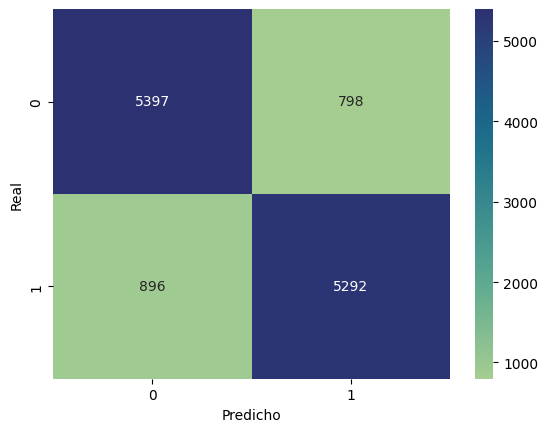

In [ ]:
y_pred_train = nn.predict(x_val_std)
classification_report_and_confusion_matrix(y_val, y_pred_train)

Como elegimos como métrica el F1 Score para optimizar la búsqueda de hiperparámetros, podemos ver que logramos alcanzar un balance entre precisión y recall, ya que resultaron ser 0.86329255 y 0.86319503, respectivamente (valores muy similares).

## **c) Generación de predicciones**

In [ ]:
f1_score_en_train = obtener_f1_score(y_val, y_pred_train)
predecir_y_exportar_a_csv(nn, df_test_completo, f1_score_en_train, epochs, batch_size)

## **d) Conclusiones finales**

Importamos los modelos con mejor performance (de acuerdo a la validación) encontrados con Cross Validation a lo largo te todo el desarrollo del TP.

In [ ]:
ruta_a_tree = '/content/TP1/Checkpoint2/Modelos y Predicciones/arbol-max_d27-entropy-ccp_alpha0.0001724-f1_score0.8544779/clf-max_d27-entropy-ccp_alpha0.0001724-f1_score0.8544779.joblib'
tree = joblib.load(ruta_a_tree)

ruta_a_knn = '/content/TP1/Checkpoint3 /Modelos y Predicciones/KNN/KNN-nn_17-w_distance-algo_ball_tree-met_manhattan-f1_0.7812/KNN-nn_17-w_distance-algo_ball_tree-met_manhattan-f1_0.7812.joblib'
knn = joblib.load(ruta_a_knn)

ruta_a_svm = '/content/TP1/Checkpoint3 /Modelos y Predicciones/SVM/SVM_rbf-ker_rbf-C_1.0-gam_scale-f1_0.8302/SVM_rbf-ker_rbf-C_1.0-gam_scale-f1_0.8302.joblib'
svm = joblib.load(ruta_a_svm)

ruta_a_rf = '/content/TP1/Checkpoint3 /Modelos y Predicciones/RF/RF-crit_gini-n_estim_140-max_f_sqrt-f1_0.8785/RF-crit_gini-n_estim_140-max_f_sqrt-f1_0.8785.joblib'
rf = joblib.load(ruta_a_rf)

ruta_a_xgb = '/content/TP1/Checkpoint3 /Modelos y Predicciones/XGBoost/XGB-n_estim_180-max_d_24-lr_0.1-gam_0.1-alp_0.8-lam_1.0-f1_0.8819/XGB-n_estim_180-max_d_24-lr_0.1-gam_0.1-alp_0.8-lam_1.0-f1_0.8819.joblib'
xgb = joblib.load(ruta_a_xgb)

ruta_a_voting_clf = '/content/TP1/Checkpoint3 /Modelos y Predicciones/Voting/voting_clf-estimators_xgb1_xgb2_xgb3-voting_soft-f1_0.8861/voting_clf-estimators_xgb1_xgb2_xgb3-voting_soft-f1_0.8861.joblib'
voting_clf = joblib.load(ruta_a_voting_clf)

ruta_a_stacking_clf = '/content/TP1/Checkpoint3 /Modelos y Predicciones/Stacking/stacking_clf-estimators_xgb1_xgb3_xgb5-f_estim_XGBoost-f1_0.8852/stacking_clf-estimators_xgb1_xgb3_xgb5-f_estim_XGBoost-f1_0.8852.joblib'
stacking_clf = joblib.load(ruta_a_stacking_clf)

ruta_a_nn = '/content/TP1/Checkpoint4/Modelos y Predicciones/NN-u_100-midl_3-act_sigmoid-lr_0.007054802495986223-kr_None-e_40-bs_950-f1_0.8632/NN-u_100-midl_3-act_sigmoid-lr_0.007054802495986223-kr_None-e_40-bs_950-f1_0.8632.h5'
with keras.utils.custom_object_scope({'_f1_score': _f1_score}): 
    nn = keras.models.load_model(ruta_a_nn)

A continuación, evaluamos la performance de cada modelo realizando las matrices de confusión para el mejor modelo hallado de cada tipo (según el F1 Score obtenido en entrenamiento y validación).

Observamos que el modelo que mejor rinde es el ensamble híbrido de tipo Voting.

Cabe destacar que se eligió F1 Score como métrica para la optimización de los hiperparámetros de todos los modelos, y como esperábamos, en todos ellos la precisión y el recall toman valores similares.

### Evaluación de performance de todos los modelos

#### Tree

              precision    recall  f1-score   support

           0     0.8549    0.8541    0.8545      6195
           1     0.8541    0.8549    0.8545      6188

    accuracy                         0.8545     12383
   macro avg     0.8545    0.8545    0.8545     12383
weighted avg     0.8545    0.8545    0.8545     12383



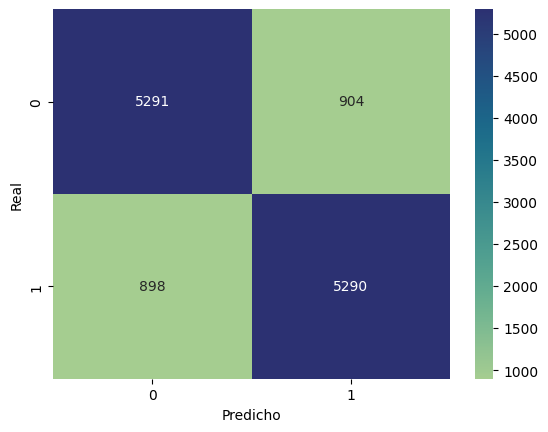

In [ ]:
y_pred_train_tree = tree.predict(x_val)
classification_report_and_confusion_matrix(y_val, y_pred_train_tree)


#### KNN

              precision    recall  f1-score   support

           0     0.8006    0.7498    0.7744      6195
           1     0.7645    0.8130    0.7880      6188

    accuracy                         0.7814     12383
   macro avg     0.7825    0.7814    0.7812     12383
weighted avg     0.7825    0.7814    0.7812     12383



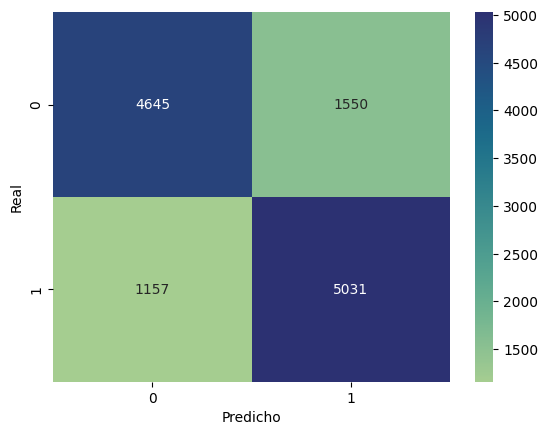

In [ ]:
y_pred_train_knn = knn.predict(x_val)
classification_report_and_confusion_matrix(y_val, y_pred_train_knn)

#### SVM

              precision    recall  f1-score   support

           0     0.8311    0.8291    0.8301      6195
           1     0.8293    0.8313    0.8303      6188

    accuracy                         0.8302     12383
   macro avg     0.8302    0.8302    0.8302     12383
weighted avg     0.8302    0.8302    0.8302     12383



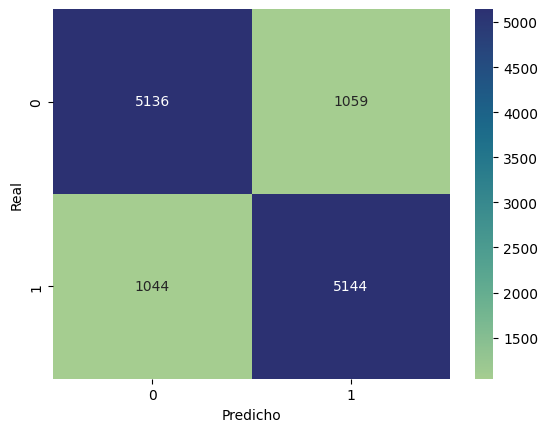

In [ ]:
y_pred_train_svm = svm.predict(x_val)
classification_report_and_confusion_matrix(y_val, y_pred_train_svm)

#### RF

              precision    recall  f1-score   support

           0     0.8701    0.8901    0.8800      6195
           1     0.8874    0.8670    0.8771      6188

    accuracy                         0.8785     12383
   macro avg     0.8787    0.8785    0.8785     12383
weighted avg     0.8787    0.8785    0.8785     12383



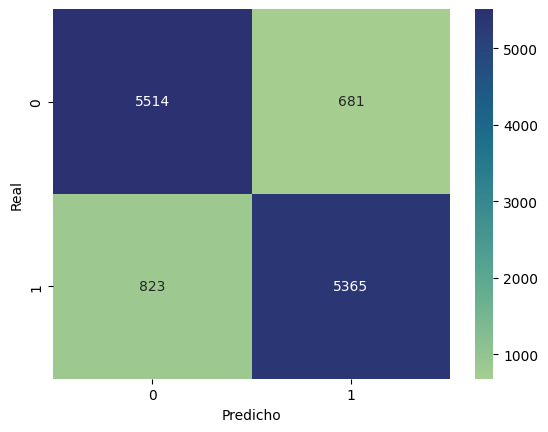

In [ ]:
y_pred_train_rf = rf.predict(x_val)
classification_report_and_confusion_matrix(y_val, y_pred_train_rf)

#### XGBoost

              precision    recall  f1-score   support

           0     0.8862    0.8765    0.8814      6195
           1     0.8777    0.8874    0.8825      6188

    accuracy                         0.8819     12383
   macro avg     0.8820    0.8819    0.8819     12383
weighted avg     0.8820    0.8819    0.8819     12383



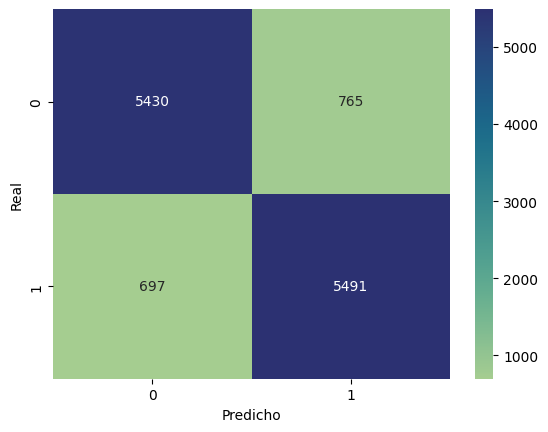

In [ ]:
y_pred_train_xgb = xgb.predict(x_val)
classification_report_and_confusion_matrix(y_val, y_pred_train_xgb)

#### Voting

              precision    recall  f1-score   support

           0     0.8923    0.8785    0.8853      6195
           1     0.8802    0.8938    0.8869      6188

    accuracy                         0.8861     12383
   macro avg     0.8862    0.8861    0.8861     12383
weighted avg     0.8862    0.8861    0.8861     12383



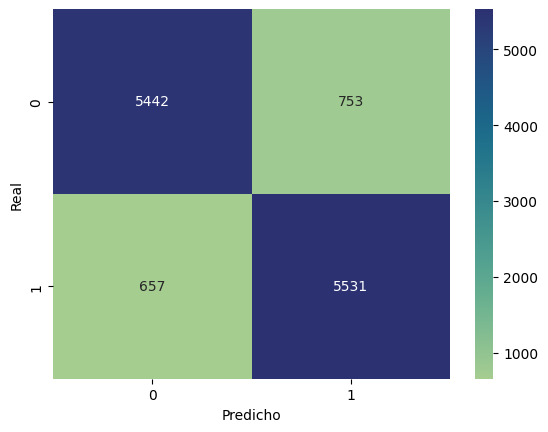

In [ ]:
y_pred_train_voting_clf = voting_clf.predict(x_val)
classification_report_and_confusion_matrix(y_val, y_pred_train_voting_clf)

#### Stacking

              precision    recall  f1-score   support

           0     0.8909    0.8780    0.8844      6195
           1     0.8796    0.8924    0.8859      6188

    accuracy                         0.8852     12383
   macro avg     0.8852    0.8852    0.8852     12383
weighted avg     0.8852    0.8852    0.8852     12383



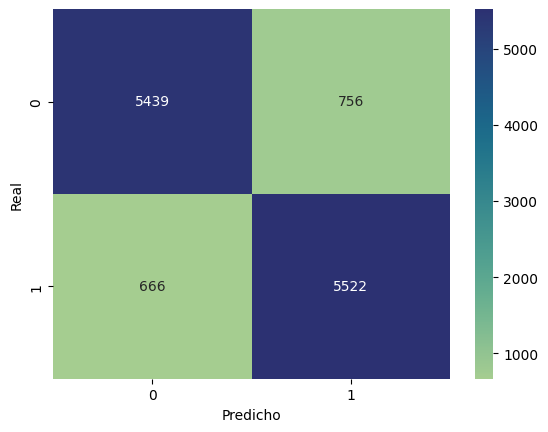

In [ ]:
y_pred_train_stacking_clf = stacking_clf.predict(x_val)
classification_report_and_confusion_matrix(y_val, y_pred_train_stacking_clf)

####NN

387/387 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0     0.8576    0.8712    0.8643      6195
           1     0.8690    0.8552    0.8620      6188

    accuracy                         0.8632     12383
   macro avg     0.8633    0.8632    0.8632     12383
weighted avg     0.8633    0.8632    0.8632     12383



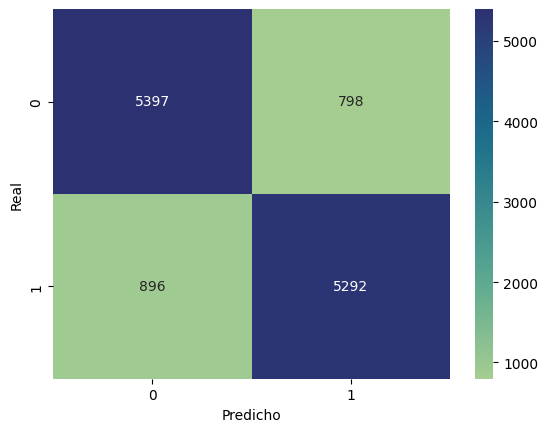

In [ ]:
y_pred_train_nn = nn.predict(x_val_std)
classification_report_and_confusion_matrix(y_val, y_pred_train_nn)

### Conclusiones

A lo largo del desarrollo del TP, partimos de un conjunto de datos que contenía registros de reservas de hotel y, mediante el preprocesamiento de datos y el entrenamiento de distintos modelos, predijimos el valor de nuestra variable target "is_canceled". En este caso, resolvimos un problema de clasificación binaria. 

Algunos modelos tuvieron un mejor rendimiento que otros y evidenciamos la mejora progresiva a medida que aumenta la complejidad de los mismos, aunque esto viene acompañado de un incremento en la cantidad de recursos necesarios para la optimización y ejecución de estos modelos.

Además, optimizamos la búsqueda de los hiperparámetros de cada modelo mediante K-Fold Cross Validation, técnica que nos permitió hallar los rendimientos mencionados anteriormente.